<a href="https://colab.research.google.com/github/MySureStart/spring_2023_vail-Mennatullah-Elsahy/blob/main/Day_05/Introduction_to_Regression_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

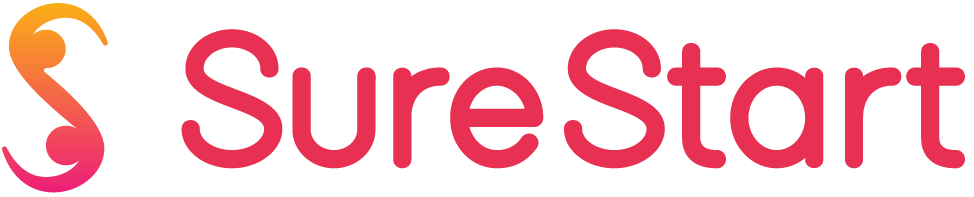

#Day 5 Objectives: 
* To introduce you to loss functions. 


# Loss Functions

Loss functions define what a good prediction is and isn’t. Choosing the right loss function dictates how well your estimator (machine learning model) will be. The criteria by which an estimator is scrutinized is its performance - how accurate the model's decisions are. This calls for a way to measure how far a particular iteration of the model is from the actual values. This is where loss functions come into play.

Loss functions measure how far an estimated value is from its true value. A loss function maps decisions to their associated costs. Loss functions are not fixed, they change depending on the task in hand and the goal to be met.

Worth to note we can speak of different kind of loss functions: **regression loss** functions and **classification loss** functions.

Regression loss function describes the difference between the values that a model is predicting and the actual values of the labels. So the loss function has a meaning on a labeled data when we compare the prediction to the label at a single point of time. This loss function is often called the error function or the error formula. Typical error functions we use for regression models are L1 and L2, Huber loss, Quantile loss, log cosh loss.

**Note**: L1 loss is also know as Mean Absolute Error. L2 Loss is also know as Mean Square Error or Quadratic loss.

Loss functions for classification represent the price paid for inaccuracy of predictions in classification problems (problems of identifying which category a particular observation belongs to). To name a few: log loss, focal loss, exponential loss, hinge loss, relative entropy loss and other.

*Note*: While more commonly used in regression, the square loss function can be re-written and utilized for classification.

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Regression Losses

Remember, in regression, the output would be a real value. We need some loss functions which compares two real values.

In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

# get per-feature statistics (mean, standard deviation) from the training set to normalize by
train_mean = np.mean(train_features, axis=0)
train_std = np.std(train_features, axis=0)
train_features = (train_features - train_mean) / train_std

57026/57026 [==============================] - 0s 0us/step


## Mean Squared Error [MSE]

As the name suggests, Mean square error is measured as the average of squared difference between predictions and actual observations. It’s only concerned with the average magnitude of error irrespective of their direction. 

However, due to squaring, predictions which are far away from actual values are penalized heavily in comparison to less deviated predictions. Plus MSE has nice mathematical properties which makes it easier to calculate gradients.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model. 

We first square the difference between the original and estimated output with $(y_i - \hat{y}_i)^2$. Then we take sum of the squared difference for all the samples. And finally divide it by the total count of samples, which is $n$. 

$$MSE = \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{n}$$

In [3]:
model = keras.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss='mse',
              metrics=['mse'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

Epoch 1/250
12/12 [==============================] - 8s 56ms/step - loss: 592.5969 - mse: 592.5969 - val_loss: 491.4631 - val_mse: 491.4631
Epoch 2/250
12/12 [==============================] - 0s 9ms/step - loss: 569.4691 - mse: 569.4691 - val_loss: 470.6776 - val_mse: 470.6776
Epoch 3/250
12/12 [==============================] - 0s 9ms/step - loss: 546.0515 - mse: 546.0515 - val_loss: 446.5483 - val_mse: 446.5483
Epoch 4/250
12/12 [==============================] - 0s 8ms/step - loss: 514.8578 - mse: 514.8578 - val_loss: 410.5729 - val_mse: 410.5729
Epoch 5/250
12/12 [==============================] - 0s 12ms/step - loss: 465.5668 - mse: 465.5668 - val_loss: 354.6135 - val_mse: 354.6135
Epoch 6/250
12/12 [==============================] - 0s 11ms/step - loss: 391.9346 - mse: 391.9346 - val_loss: 274.7484 - val_mse: 274.7484
Epoch 7/250
12/12 [==============================] - 0s 12ms/step - loss: 296.8525 - mse: 296.8525 - val_loss: 179.8267 - val_mse: 179.8267
Epoch 8/250
12/12 [====

## Question 1

Now that you know how MSE works, you need to plot the behavior of MSE for the synthetic errors given.  

### Answer 1

In [ ]:
# Define errors
errors = np.arange(-5, 6)
n = len(errors)

# Define mean squared error function
def mse():
    return (errors ** 2).mean()

# Compute mean squared errors for each error value
mse_values = [mse() for error in errors]

# Plot MSE values
plt.plot(errors, mse_values, c='#ED4F46', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated outputs')
plt.ylabel('Mean Squared Errors')
plt.show()


## Mean Absolute Error [MAE]

Mean absolute error, on the other hand, is measured as the average of sum of absolute differences between predictions and actual observations. 

Like MSE, this as well measures the magnitude of error without considering their direction. 

Unlike MSE, MAE needs more complicated tools such as linear programming to compute the gradients. Plus MAE is more robust to outliers since it does not make use of square.

Let's assume there are $n$ data samples, for $i^{th}$ sample; the actual output is $y_i$ and $\hat{y}_i$ is the estimated output from the regression model. 

We first take the absolute difference between the original and estimated output with $|y_i - \hat{y}_i|2$. Then we take sum of the absolute differences for all the samples. And finally divide it by the total count of samples, which is $n$. 

$$MSE = \frac{\sum_{i=1}^{n}|y_i - \hat{y}_i|}{n}$$

In [ ]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss='mae',
              metrics=['mae'])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)

## Question 2

Now that you know how MAE works, you need to plot the behavior of MAE for the synthetic errors given.  

### Answer 2

In [ ]:
# Define errors
errors = np.arange(-5, 6)
n = len(errors)

# Define mean absolute error function
def mae():
    return np.abs(errors).mean()

# Compute mean absolute errors for each error value
mae_values = [mae() for error in errors]

# Plot MAE values
plt.plot(errors, mae_values, c='#0095B6', marker='o')
plt.grid()
plt.xlabel('Difference between actual and estimated outputs')
plt.ylabel('Mean Absolute Errors')
plt.show()


## Mean Squared Logarithmic Error [MSLE]

MSLE is just like MSE, but we have to take $log$ of the actual and estimated outputs because squaring and averaging. 

The introduction of the logarithm makes MSLE only care about the relative difference between the true and the predicted value, or in other words, it only cares about the percentual difference between them.

This means that MSLE will treat small differences between small true and predicted values approximately the same as big differences between large true and predicted values.

We can use MSLE when we don't want large errors to be significantly more penalized than small ones, in those cases where the range of the target value is large.

*Example*: You want to predict future house prices, and your dataset includes homes that are orders of magnitude different in price. The price is a continuous value, and therefore, we want to do regression. MSLE can here be used as the loss function.

$$MSLE = \frac{\sum_{i=1}^{n}(\log(y_i+1) - \log(\hat{y}_i+1))^2}{n}$$

In [ ]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss=tf.keras.losses.MeanSquaredLogarithmicError(),
              metrics=['mean_squared_logarithmic_error'])

model.fit(train_features, train_labels, epochs=150, validation_split = 0.1)

## Question 3

Now that you know how MSLE works, you need to plot the behavior of MSLE for the synthetic errors given.  

### Answer 3

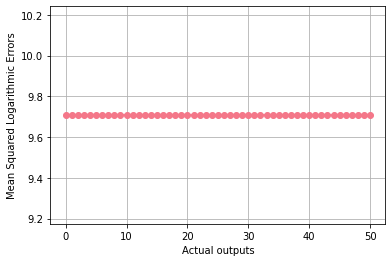

In [7]:
# Define actual and estimated outputs
actual_outputs = np.arange(0, 51)
n = len(actual_outputs)
estimated_outputs = np.zeros(n)

# Define mean squared logarithmic error function
def msle():
    return ((np.log(1 + actual_outputs) - np.log(1 + estimated_outputs)) ** 2).mean()

# Compute mean squared logarithmic errors for each actual output value
msle_values = [msle() for actual_output in actual_outputs]

# Plot MSLE values
plt.plot(actual_outputs, msle_values, c='#F47789', marker='o')
plt.grid()
plt.xlabel('Actual outputs')
plt.ylabel('Mean Squared Logarithmic Errors')
plt.show()


## Question 4

Why do we add $1$ to the outputs before passing it through $\log()$? 


### Answer 4

To avoid the logarithm of zero, which is undefined. The formula for mean squared logarithmic error is:

$$MSLE = \frac 1{n}{\sum_{i=1}^{n}(\log(y_i+1) - \log(\hat{y}_i+1))^2}$$ 
 
Here, $y_i$ is the actual output, and $\hat{y}_i$ is the estimated output. By adding 1 to both $y_i$ and $\hat{y}_i$, we ensure that the logarithm is only taken of positive values, and we avoid taking the logarithm of zero. This helps to make the mean squared logarithmic error more well-defined and numerically stable.


## Question 5

Write your observations about MSE, MAE, and MSLE; and compare the results achieved with all 3 loss functions. 


### Answer 5

Mean squared error (MSE), mean absolute error (MAE), and mean squared logarithmic error (MSLE) are three common loss functions used in regression problems. Here are some observations and comparisons:

* MSE measures the average squared difference between the actual and predicted values. It penalizes larger errors more heavily than smaller errors. It is sensitive to outliers and can be influenced by large errors.

* MAE measures the average absolute difference between the actual and predicted values. It gives equal weight to all errors, regardless of their size. It is less sensitive to outliers than MSE.

* MSLE measures the average squared logarithmic difference between the actual and predicted values. It is often used when the data has a wide range of values or when the errors are expected to be proportional to the size of the actual value. It penalizes underestimation more heavily than overestimation.

When comparing the results achieved with all three loss functions, it is important to consider the specific problem and the characteristics of the data. In some cases, one loss function may be more appropriate than the others. For example, MSE may be appropriate when the data has a normal distribution, while MAE may be better for data with heavy-tailed distributions. MSLE may be suitable when the errors are expected to be proportional to the actual values.

It's a good idea to try multiple loss functions and compare their results to determine the most appropriate one for a specific problem.

## Question 6

Plug-in any of the loss functions from [TensorFlow](https://www.tensorflow.org/api_docs/python/tf/keras/losses) docs to the `model.compile` method and see if the difference in model performance as compared to MSE, MAE, and MSLE.

### Answer 6

In [8]:
model = keras.Sequential([
        tf.keras.layers.Dense(100, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(50, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(20, activation='relu', input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(1)
    ])

model.compile(optimizer='adam', 
              loss='mape',
              metrics=["mape", "msle"])

model.fit(train_features, train_labels, epochs=250, validation_split = 0.1)


Epoch 1/250
12/12 [==============================] - 2s 20ms/step - loss: 98.4612 - mape: 98.4612 - msle: 8.2752 - val_loss: 94.5954 - val_mape: 94.5954 - val_msle: 5.9275
Epoch 2/250
12/12 [==============================] - 0s 6ms/step - loss: 91.5593 - mape: 91.5593 - msle: 5.0643 - val_loss: 86.6796 - val_mape: 86.6796 - val_msle: 3.7105
Epoch 3/250
12/12 [==============================] - 0s 7ms/step - loss: 82.2171 - mape: 82.2171 - msle: 3.0853 - val_loss: 75.2720 - val_mape: 75.2720 - val_msle: 2.0983
Epoch 4/250
12/12 [==============================] - 0s 7ms/step - loss: 68.6003 - mape: 68.6003 - msle: 1.6721 - val_loss: 61.2005 - val_mape: 61.2005 - val_msle: 0.9962
Epoch 5/250
12/12 [==============================] - 0s 9ms/step - loss: 54.5246 - mape: 54.5246 - msle: 0.7568 - val_loss: 45.0534 - val_mape: 45.0534 - val_msle: 0.3735
Epoch 6/250
12/12 [==============================] - 0s 10ms/step - loss: 38.2064 - mape: 38.2064 - msle: 0.3054 - val_loss: 31.5428 - val_mape:

#Fun Fact

Google Translate is getting better all the time, but it's still not perfect. Translate a sentence into another language and back into English, and you might get a hilarious surprise. That's what Malinda Kathleen Reese got when she reverse Google Translated the lyrics to "Let It Go" from Disney's Frozen into Chinese, Macedonian, French, Polish, Creole, Tamil and others. It doesn't come out as utter gibberish, but as a slightly off version with a slightly different message from the original. Which makes it even funnier. Plus, Malinda can really sing.

Link to video: https://www.youtube.com/watch?v=2bVAoVlFYf0

Sources:

https://towardsdatascience.com/common-loss-functions-in-machine-learning-46af0ffc4d23

https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/mean-squared-logarithmic-error-(msle)